In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import pickle
import json

import warnings
warnings.filterwarnings('ignore')

### 1.Problem Statement

### 2.Data Gathering

In [2]:
df = pd.read_csv('medical_insurance.csv')
df

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### 3.EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### 4. Feature Engineering

### 1. gender

In [4]:
df['gender']

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: gender, Length: 1338, dtype: object

In [5]:
df['gender'].value_counts()

gender
male      676
female    662
Name: count, dtype: int64

In [6]:
df['gender'].replace({'male':1, 'female':0},inplace = True)

In [7]:
gender_data = {'male':1, 'female':0}

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 73.3+ KB


### 2. smoker 

In [9]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [10]:
df['smoker'].replace({'yes':1, 'no':0}, inplace = True)


In [11]:
smoker_data = {'yes':1, 'no':0}

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


### 3. region

In [13]:
df['region']

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object

In [14]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [15]:
df = pd.get_dummies(df, columns=['region'], dtype = int)
df

,age,gender,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   gender            1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   int32  
 7   region_northwest  1338 non-null   int32  
 8   region_southeast  1338 non-null   int32  
 9   region_southwest  1338 non-null   int32  
dtypes: float64(2), int32(4), int64(4)
memory usage: 83.8 KB


### 5. Feature Selection/Extraction

In [17]:
df.corr()

,age,gender,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
gender,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.002425,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
region_northeast,0.002475,-0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


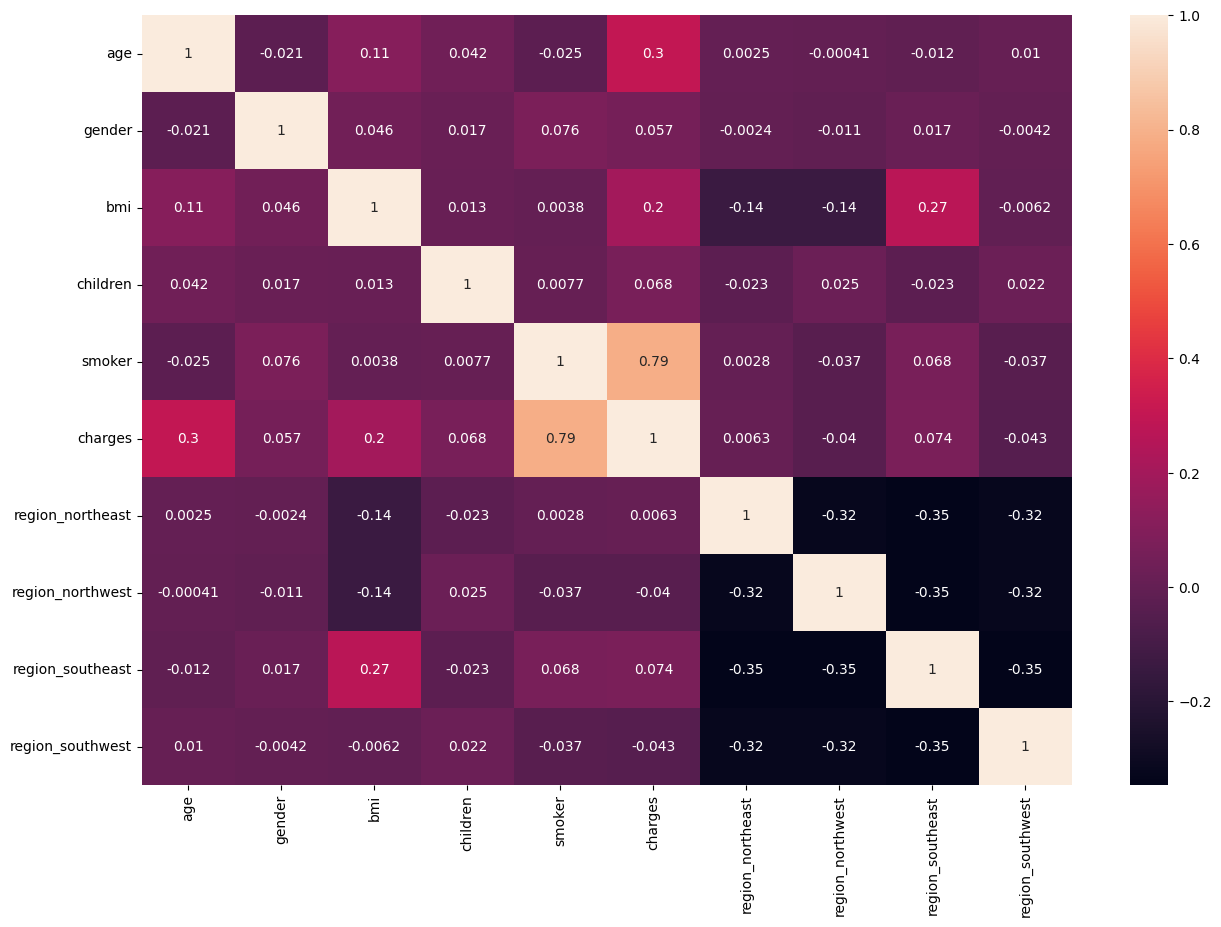

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot = True)
plt.savefig("insurence_corr.png")

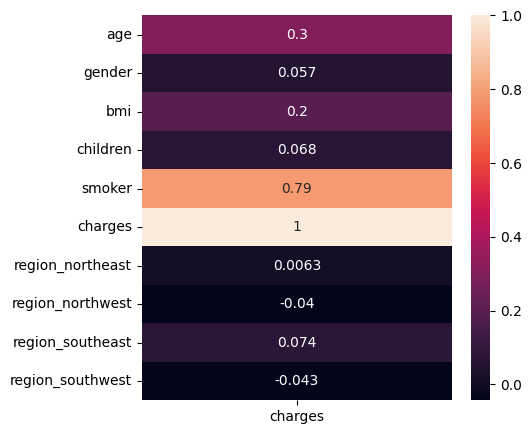

In [19]:
plt.figure(figsize = (5,5))
sns.heatmap(df.corr()[['charges']], annot = True)
plt.savefig("charges_corr.png")

#### check Multicolinearity

In [20]:
x = df.drop('charges', axis = 1)
y = df['charges']

In [21]:
x

,age,gender,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,0,1
1,18,1,33.770,1,0,0,0,1,0
2,28,1,33.000,3,0,0,0,1,0
3,33,1,22.705,0,0,0,1,0,0
4,32,1,28.880,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,0,1,0,0
1334,18,0,31.920,0,0,1,0,0,0
1335,18,0,36.850,0,0,0,0,1,0
1336,21,0,25.800,0,0,0,0,0,1


In [22]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [23]:
vif =[]
for i in range (x.shape[1]):
    vif1= variance_inflation_factor(x.to_numpy(),i)
    vif.append(vif1)
vif

[1.0168221490038107,
 1.008900162100573,
 1.1066297324286172,
 1.0040106421370243,
 1.0120736649061481,
 8.603068768898924,
 8.636204844042892,
 11.535194994662813,
 9.218448877575907]

In [24]:
vif_values = pd.Series(vif,index = x.columns)
vif_values

age                  1.016822
gender               1.008900
bmi                  1.106630
children             1.004011
smoker               1.012074
region_northeast     8.603069
region_northwest     8.636205
region_southeast    11.535195
region_southwest     9.218449
dtype: float64

<Axes: >

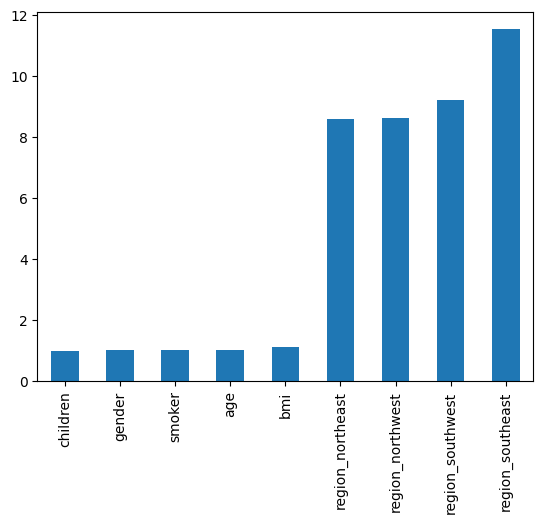

In [25]:
vif_values.sort_values().plot(kind = "bar")

### Model Training

In [26]:
x = df.drop('charges', axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=13)

In [27]:
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

LinearRegression()

### EValuation

In [28]:
y_pred = linear_reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2_value = r2_score(y_test, y_pred)
print("R-Squared :",r2_value)

RMSE : 5344.218063789126
MAE : 3820.7706849786423
R-Squared : 0.7990637930035749


In [29]:
y_pred_train = linear_reg.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)

print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2_value = r2_score(y_train, y_pred_train )
print("R-Squared :",r2_value)

RMSE : 6208.777094817647
MAE : 4333.696951659548
R-Squared : 0.7385339139130735


## Single Row Testing

In [30]:
x_test[55:56]

,age,gender,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
902,26,1,27.265,3,0,1,0,0,0


In [31]:
linear_reg.predict(x_test[55:56])[0]

5491.855158482564

In [32]:
age = 30
gender = 'male'
bmi = 28.265
children = 2
smoker = 'yes'
region = 'northwest'


In [33]:
column_names = x.columns.tolist()
column_names

['age',
 'gender',
 'bmi',
 'children',
 'smoker',
 'region_northeast',
 'region_northwest',
 'region_southeast',
 'region_southwest']

In [34]:
x.shape[1]

9

In [35]:
linear_reg.n_features_in_

9

In [36]:
age = 30
gender = 'male'
bmi = 28.265
children = 2
smoker = 'yes'
region = 'northwest'

gender = gender_data[gender]
smoker = smoker_data[smoker]
region = 'region_'+region

region_index = column_names.index(region)
region_index

test_array = np.zeros([1,linear_reg.n_features_in_])
test_array[0,0] = age
test_array[0,1] = gender
test_array[0,2] = bmi
test_array[0,3] = children
test_array[0,4] = smoker
test_array[0,region_index] = 1

predicted_charges = np.around(linear_reg.predict(test_array)[0],3)

In [37]:
with open('linear_regression.pkl','wb') as f:
    pickle.dump(linear_reg, f)

In [38]:
project_data = {"Gender": gender_data,
               "Smoker":smoker_data,
               "Column Names" : column_names}

with open('proj_data.json','w') as f:
    json.dump(project_data, f)